# Amazon Product Reviews Exploratory Data Analysis

In [4]:
#!pip install wordcloud

In [5]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## 1. Merging the data

In [6]:
#data_2 = pd.read_csv("data/amazon_reviews_us_Books_v1_01.tsv", sep="\t",  on_bad_lines='skip')
#data_2.shape

In [7]:
#book_detail = pd.read_csv("data/books_data.csv")
#book_detail.shape
#book_detail.rename(columns = {'Title':'product_title'}, inplace = True)

In [8]:
#merging
#df = pd.merge(data_2, book_detail, on="product_title")

In [9]:
#df.to_csv("data/amazon_book_reviws.csv", index= False)

## 2. Loading the data

In [10]:
amazon_books_data = pd.read_csv("data/amazon_book_reviws.csv")

In [11]:
amazon_books_data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_date,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,US,27780192,RCLZ5OKZNUSY4,146854456X,270349766,Unfinished Business,Books,5.0,0.0,0.0,...,2012-05-03,"A powerful, persuasive, thought-provoking visi...",['Anne-Marie Slaughter'],http://books.google.com/books/content?id=iYFjC...,http://books.google.com/books?id=iYFjCgAAQBAJ&...,Penguin Group Australia,2015-09-30,http://books.google.com/books?id=iYFjCgAAQBAJ&...,['Social Science'],NaN
1,US,32352625,R1D8VIBJCTHQS5,0373791291,443145886,Unfinished Business,Books,5.0,0.0,0.0,...,2012-02-07,"A powerful, persuasive, thought-provoking visi...",['Anne-Marie Slaughter'],http://books.google.com/books/content?id=iYFjC...,http://books.google.com/books?id=iYFjCgAAQBAJ&...,Penguin Group Australia,2015-09-30,http://books.google.com/books?id=iYFjCgAAQBAJ&...,['Social Science'],NaN
2,US,25193603,R1BYWIFPCAVEQU,0971291500,267281772,Unfinished Business,Books,5.0,0.0,0.0,...,2011-08-13,"A powerful, persuasive, thought-provoking visi...",['Anne-Marie Slaughter'],http://books.google.com/books/content?id=iYFjC...,http://books.google.com/books?id=iYFjCgAAQBAJ&...,Penguin Group Australia,2015-09-30,http://books.google.com/books?id=iYFjCgAAQBAJ&...,['Social Science'],NaN
3,US,51824561,RJXMK8KU04JCA,0060847891,510124511,Unfinished Business,Books,3.0,2.0,2.0,...,2011-04-23,"A powerful, persuasive, thought-provoking visi...",['Anne-Marie Slaughter'],http://books.google.com/books/content?id=iYFjC...,http://books.google.com/books?id=iYFjCgAAQBAJ&...,Penguin Group Australia,2015-09-30,http://books.google.com/books?id=iYFjCgAAQBAJ&...,['Social Science'],NaN
4,US,29360619,RKI83O87D2DJ1,1408809443,777169356,Unfinished Business,Books,3.0,4.0,4.0,...,2011-04-20,"A powerful, persuasive, thought-provoking visi...",['Anne-Marie Slaughter'],http://books.google.com/books/content?id=iYFjC...,http://books.google.com/books?id=iYFjCgAAQBAJ&...,Penguin Group Australia,2015-09-30,http://books.google.com/books?id=iYFjCgAAQBAJ&...,['Social Science'],NaN


In [12]:
amazon_books_data['review_headline']

0                                         Excellent read!!!
1                                                Love story
2                                               LDS Fiction
3                              Interestng, but.............
4                                       Haunted by the Past
                                ...                        
474742                                 From the Back Cover:
474743    Deep subject, scholarly approach, but easy to ...
474744                        Some good ideas for security.
474745                  Don't buy from college books direct
474746    Effectively Takes On Needed Discussion Of Emba...
Name: review_headline, Length: 474747, dtype: object

In [13]:
amazon_books_data['categories'] = amazon_books_data['categories'].str.replace(r'[][]', '', regex=True) 
amazon_books_data['authors'] = amazon_books_data['authors'].str.replace(r'[][]', '', regex=True) 

In [14]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe
count_1 = amazon_books_data['review_headline'].str.count(' ') + 1
count_2 = amazon_books_data['review_body'].str.count(' ') + 1

In [15]:
amazon_books_data['word_count'] = count_1+count_2

In [16]:
amazon_books_data['star_rating']

0         5.0
1         5.0
2         5.0
3         3.0
4         3.0
         ... 
474742    4.0
474743    5.0
474744    4.0
474745    1.0
474746    5.0
Name: star_rating, Length: 474747, dtype: float64

In [17]:
amazon_books_data.shape

(474747, 25)

In [18]:
amazon_books_data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'description',
       'authors', 'image', 'previewLink', 'publisher', 'publishedDate',
       'infoLink', 'categories', 'ratingsCount', 'word_count'],
      dtype='object')

In [19]:
amazon_books_data['product_title'][282]

'Voyagers: The Sleeping Abductees Volume 1, 2nd edition'

In [20]:
amazon_books_data['image'][282]

'http://books.google.com/books/content?id=MxIFAAAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api'

In [21]:
amazon_books_data['review_headline'][282]

'Enlightening'

In [22]:
amazon_books_data['review_body'][282]

'After determining the subject matter of these books, I ordered them both, wanting to expand my understanding of why things are the way they are, here on our planet.  I received the 2nd one first, and tried to start with it.  Bad idea!  I was obviously over my head with this one!!  Once I received the first volume, it was somewhat easier to wade into, although I wouldn\'t call either of them an easy read, by any stretch of the imagination!! There were moments of \'brain strain\', and I had to take time out to process what I\'d read, before diving in again.  What I got out of these writings were validation and hope!!  That what is going on here on our earth goes beyond our corrupt human governments, and that there are positive entities that are working with us to help save our planet from the destructive forces which are so apparent to anyone who is aware, and trying to find a way to counter them. It made comprehending David Icke\'s writings much easier, and it\'s all starting to come t

In [23]:
amazon_books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474747 entries, 0 to 474746
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        474747 non-null  object 
 1   customer_id        474747 non-null  int64  
 2   review_id          474747 non-null  object 
 3   product_id         474747 non-null  object 
 4   product_parent     474747 non-null  int64  
 5   product_title      474747 non-null  object 
 6   product_category   474747 non-null  object 
 7   star_rating        474747 non-null  float64
 8   helpful_votes      474747 non-null  float64
 9   total_votes        474747 non-null  float64
 10  vine               474747 non-null  object 
 11  verified_purchase  474747 non-null  object 
 12  review_headline    474741 non-null  object 
 13  review_body        474746 non-null  object 
 14  review_date        474694 non-null  object 
 15  description        384489 non-null  object 
 16  au

In [24]:
amazon_books_data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,ratingsCount,word_count
count,4.747470e+05,4.747470e+05,474747.000000,474747.000000,474747.000000,240680.000000,474740.000000
mean,3.342033e+07,5.039466e+08,4.184852,4.616922,6.636343,146.144133,171.520253
std,1.465801e+07,2.882305e+08,1.215704,17.174190,20.836082,647.007859,223.974605
min,9.873169e+06,3.571000e+03,1.000000,0.000000,0.000000,1.000000,2.000000
25%,1.849132e+07,2.545660e+08,4.000000,0.000000,1.000000,2.000000,52.000000
50%,3.487063e+07,5.053417e+08,5.000000,2.000000,2.000000,6.000000,101.000000
75%,4.848890e+07,7.506499e+08,5.000000,4.000000,6.000000,25.000000,202.000000
max,5.309658e+07,9.999937e+08,5.000000,3188.000000,3920.000000,4895.000000,8613.000000


### 2. Checking for missing values 

In [25]:
amazon_books_data.isnull().sum()

marketplace               0
customer_id               0
review_id                 0
product_id                0
product_parent            0
product_title             0
product_category          0
star_rating               0
helpful_votes             0
total_votes               0
vine                      0
verified_purchase         0
review_headline           6
review_body               1
review_date              53
description           90258
authors               63398
image                 78395
previewLink           54474
publisher            111260
publishedDate         56573
infoLink              54474
categories            77462
ratingsCount         234067
word_count                7
dtype: int64

In [26]:
#dropping rows of null values
amazon_books_data = amazon_books_data.dropna()
amazon_books_data.shape

(217976, 25)

In [27]:
# dropping Duplicates
amazon_books_data.drop_duplicates(inplace = True)
amazon_books_data.shape

(217976, 25)

## saving the updated data

In [99]:
amazon_books_data.to_csv("data/updated_amazon_books.csv")

## 3. Data Visualization

In [28]:
#https://www.geeksforgeeks.org/data-visualization-with-python/
#https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python
#https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/

### Books Categories

In [29]:
categories = amazon_books_data['categories'].unique()

In [30]:
len(categories)

605

In [31]:
#https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
genre_df =  amazon_books_data['categories'].value_counts().rename_axis('genre').reset_index(name='counts')

In [32]:
#genre_df

In [33]:
top_15_genre = genre_df['genre'].tolist()[:15]
top_15_genre

["'Fiction'",
 "'Juvenile Fiction'",
 "'Biography & Autobiography'",
 "'Religion'",
 "'History'",
 "'Business & Economics'",
 "'Cooking'",
 "'Juvenile Nonfiction'",
 "'Family & Relationships'",
 "'Young Adult Fiction'",
 "'Health & Fitness'",
 "'Body, Mind & Spirit'",
 "'Self-Help'",
 "'Computers'",
 "'Social Science'"]

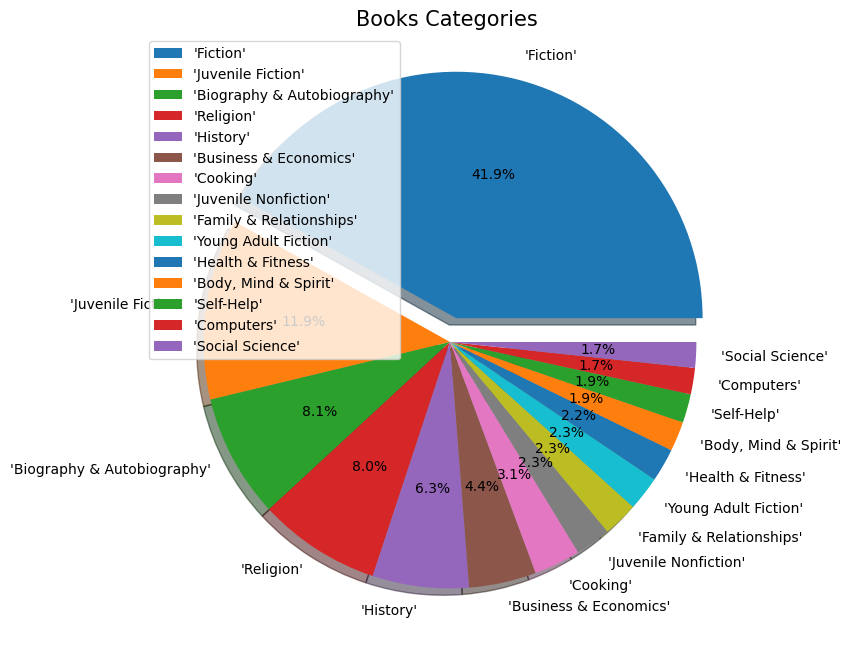

In [34]:
plt.rcParams['figure.figsize'] = (8, 8)
labels= top_15_genre
plt.pie(amazon_books_data['categories'].value_counts().head(15),explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Books Categories ', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

## Frequencies of Categories 

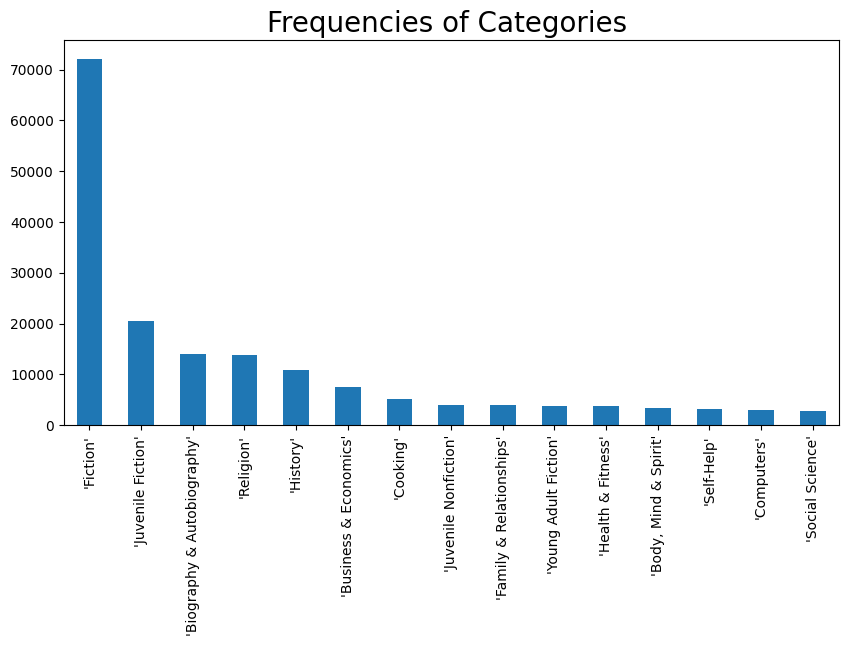

In [35]:
amazon_books_data['categories'].value_counts().head(15).sort_values(ascending = False).plot(kind='bar', figsize=(10,5))
plt.title('Frequency of Categories ', fontsize = 20)
plt.show()

## Catgeories with Vine program [Y, N] 

In [56]:
#https://stackoverflow.com/questions/67030528/pandas-plot-bar-charts-where-x-and-y-values-are-column-values
g = amazon_books_data.groupby(['categories'])['vine'].value_counts(normalize=True).sort_values(ascending = False).unstack().mul(100).drop_duplicates().head(15)
#g['%'] = amazon_books_data.categories.value_counts(normalize=True).mul(100)

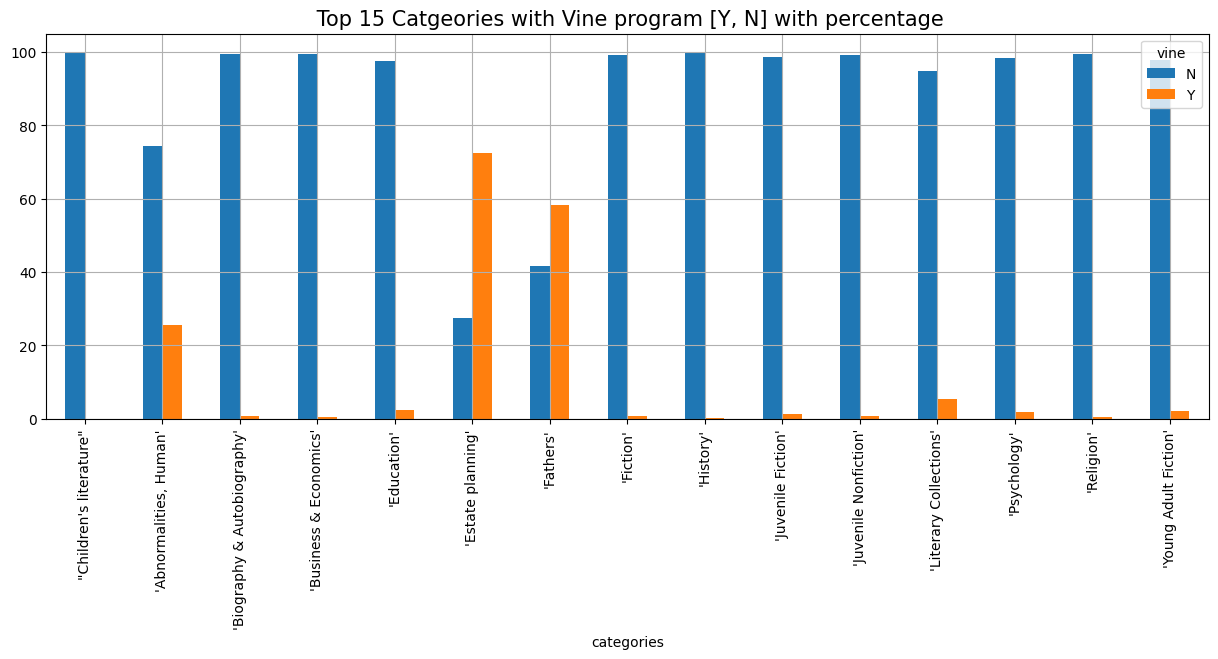

In [57]:
g.plot(kind='bar', figsize=(15,5))
plt.title(' Top 15 Catgeories with Vine program [Y, N]', fontsize = 15)
plt.grid()
plt.show()

### 2. Wordcloud of Review Title

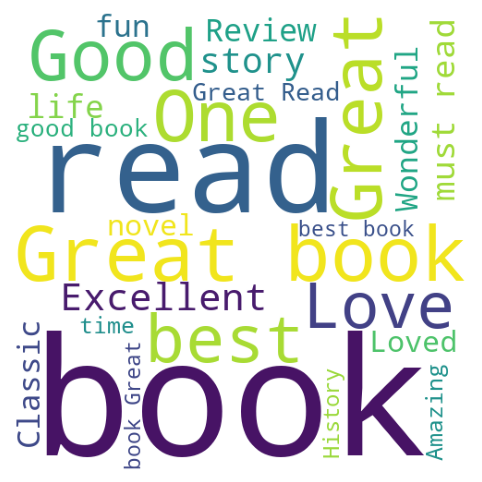

In [38]:
word_cloud = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
colud_with_star = word_cloud.generate(amazon_books_data[amazon_books_data['star_rating']> 3]['review_headline'].str.cat(sep=" "))

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(colud_with_star)

### 3. Wordcloud of Review body

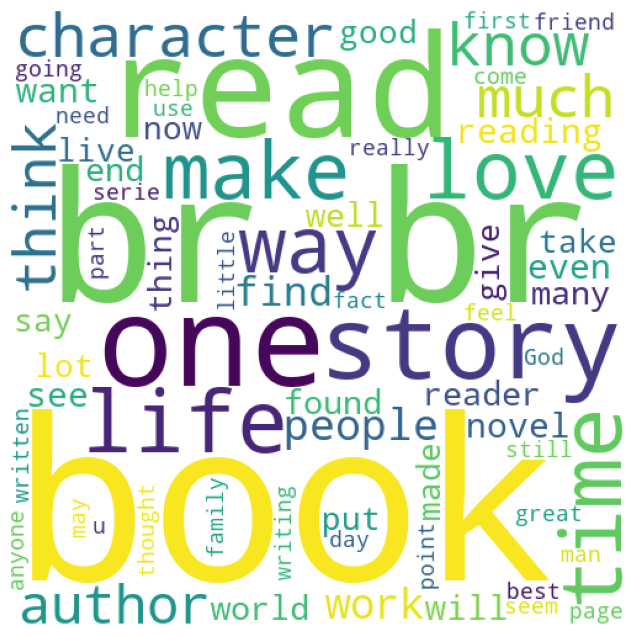

In [39]:
word_cloud = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
colud_with_star = word_cloud.generate(amazon_books_data[amazon_books_data['star_rating']> 3]['review_body'].str.cat(sep=" "))

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(colud_with_star)

### 4. Books with the highest reviews

In [40]:
review_df =amazon_books_data[amazon_books_data['word_count'] > 4000 ][['product_title', 'word_count']].sort_values(ascending = False, by = 'word_count')

In [41]:
review_df, review_df.shape

(                                            product_title  word_count
 136945  And the Dead Shall Rise: The Murder of Mary Ph...      7766.0
 26383                                   Wide Sargasso Sea      6728.0
 225283                                      Stolen Legacy      6606.0
 259601                                  Rewriting History      5847.0
 24189   The Mystery of Capital: Why Capitalism Triumph...      5739.0
 95203   Bury My Heart at Wounded Knee: An Indian Histo...      5546.0
 26044                                          The Hobbit      5461.0
 310393  Age of Propaganda: The Everyday Use and Abuse ...      5419.0
 160560                        The Cold War: A New History      4957.0
 48202   Montessori from the Start: The Child at Home, ...      4694.0
 290955  Japanese for Everyone: A Functional Approach t...      4643.0
 249745  Let Freedom Ring: Winning the War of Liberty o...      4598.0
 208698                              Keepers of the Garden      4476.0
 87022

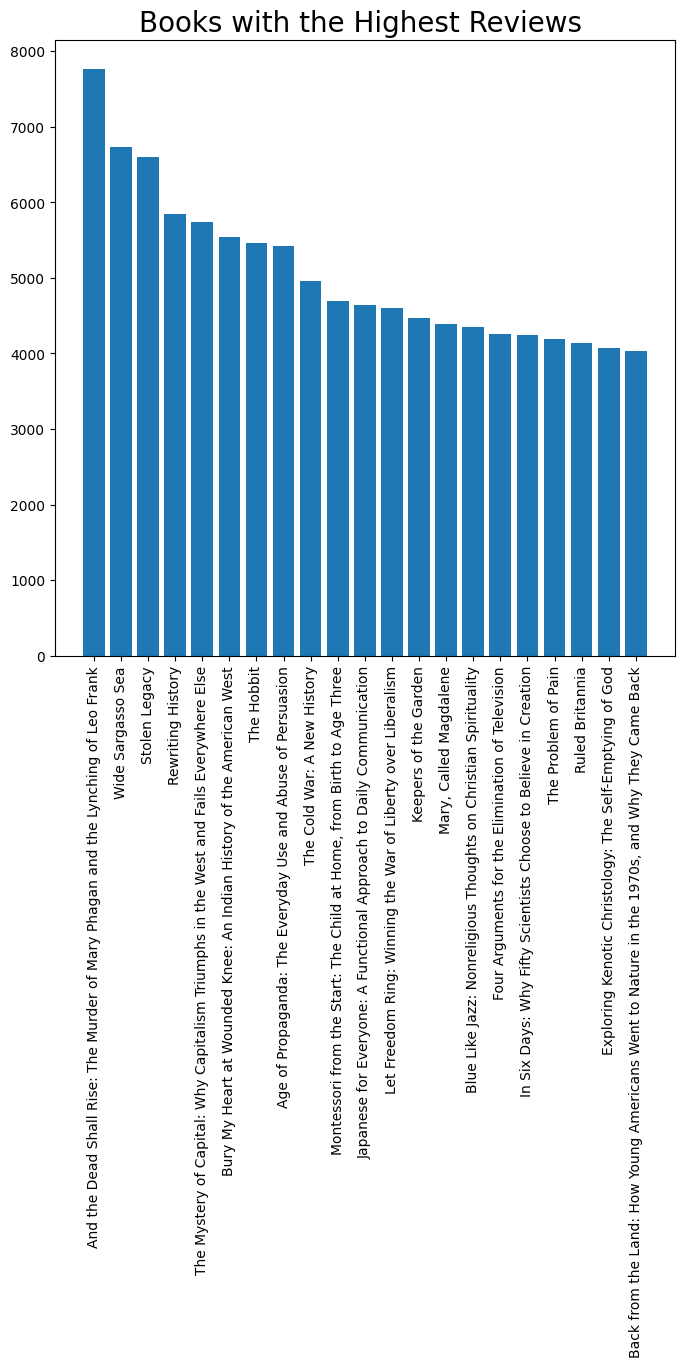

In [42]:
plt.bar(review_df['product_title'], review_df['word_count'])
plt.title('Books with the Highest Reviews ', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Books with Highest Rating 

In [43]:
rating_df =amazon_books_data[amazon_books_data['ratingsCount']>3500][['product_title', 'ratingsCount']].sort_values(ascending = False, by = 'ratingsCount').drop_duplicates()

In [44]:
rating_df

,product_title,ratingsCount
4694,The Alchemist,4895.0
89694,Unbroken,4572.0
120967,Blue Like Jazz: Nonreligious Thoughts on Chris...,4562.0
53345,Eclipse,4392.0
40713,Redeeming Love,4249.0
236287,A Walk in the Woods,4234.0
367567,"Travel Light, Eat Heavy Along the Appalachian ...",4161.0
318620,Henrietta,4067.0
451271,Atlas Shrugged (2-volume set),3972.0
190626,La Otra historia de los Estados Unidos (Spanis...,3959.0


In [45]:
rating_df.shape

(28, 2)

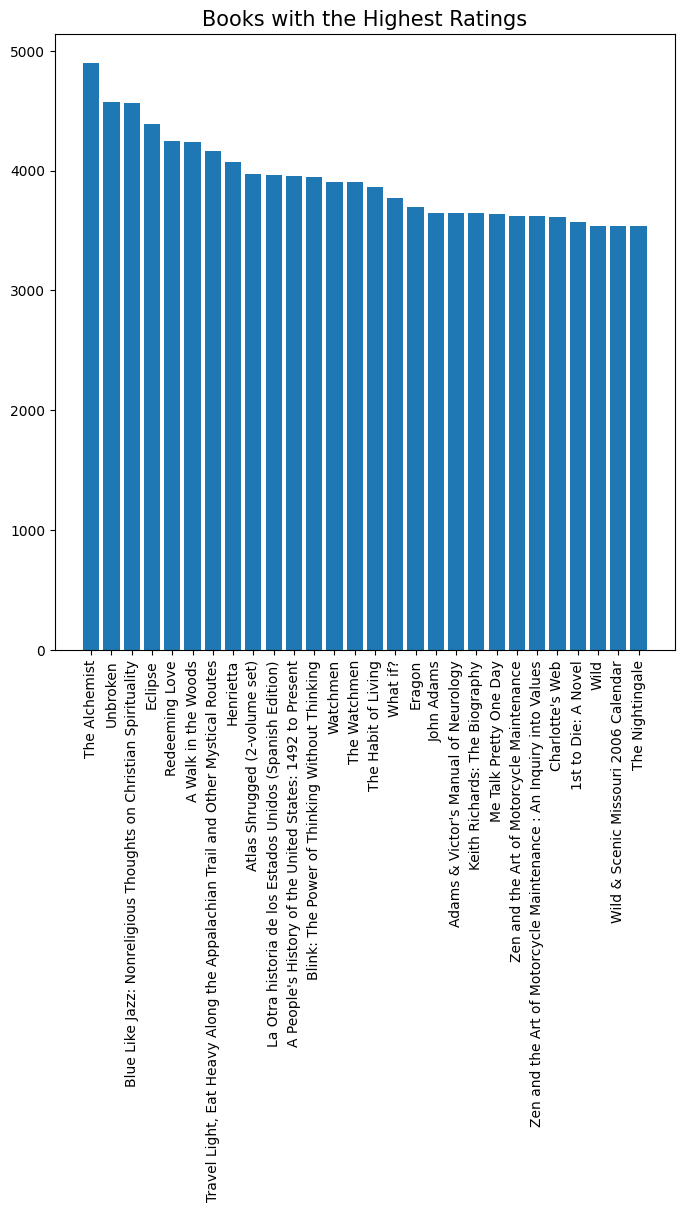

In [46]:
plt.bar(rating_df['product_title'],rating_df['ratingsCount'])
plt.title('Books with the Highest Ratings', fontsize = 15)
plt.xticks(rotation  = 'vertical')
plt.show()

## First 10 books with rating count and star rating

In [60]:
books_rating = amazon_books_data.groupby("product_title").mean()[["ratingsCount", "star_rating"]].head(10)

C:\Users\Manali\AppData\Local\Temp\ipykernel_5300\1081930450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_rating = amazon_books_data.groupby("product_title").mean()[["ratingsCount", "star_rating"]].head(10)


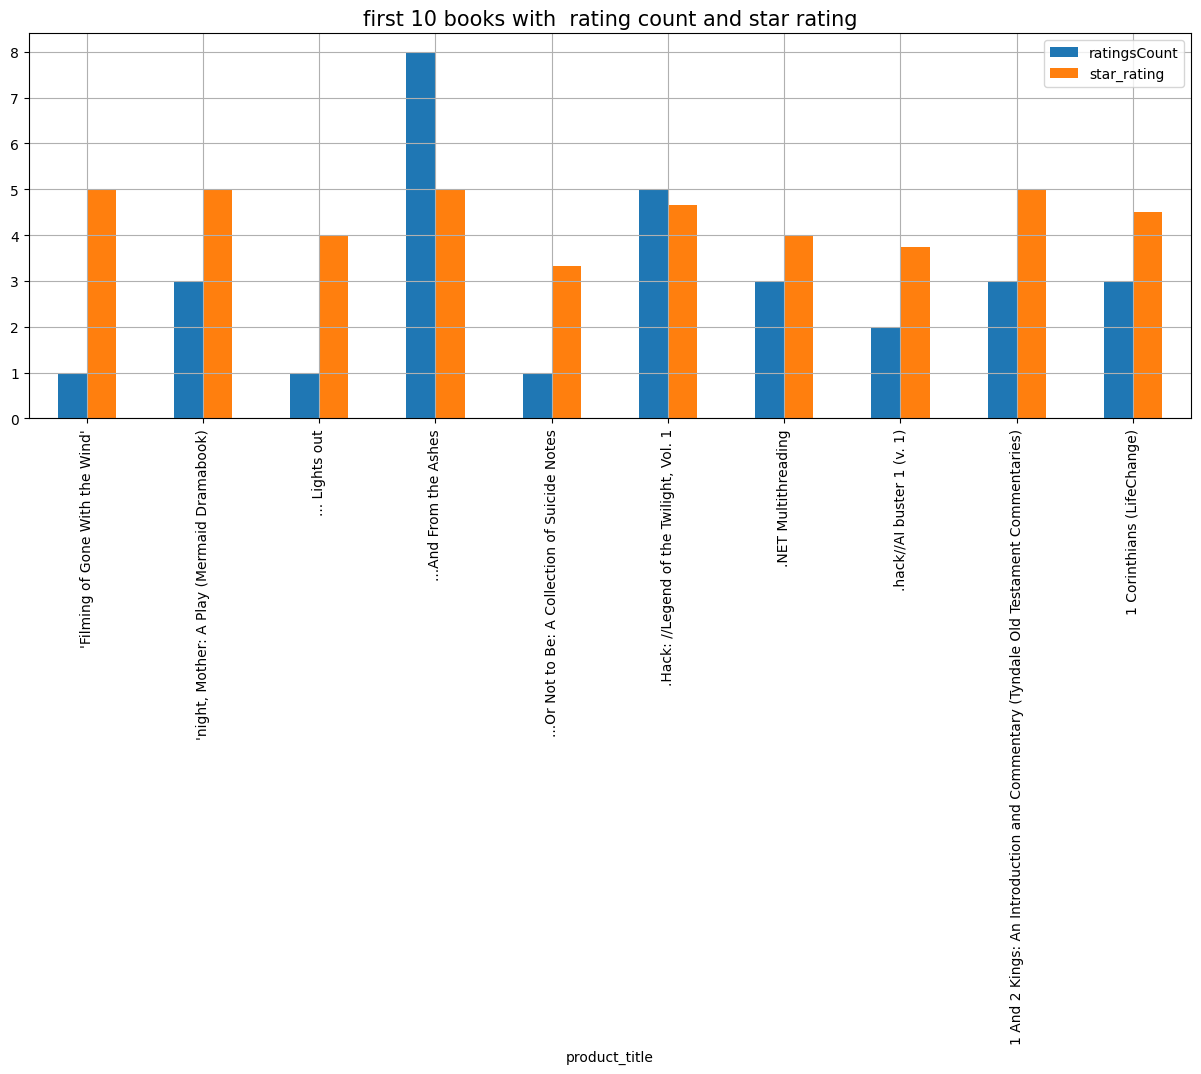

In [61]:
books_rating.plot(kind='bar', figsize=(15,5))
plt.title('first 10 books with  rating count and star rating', fontsize = 15)
plt.grid()
plt.show()

## First 10 books with helpful votes and total votes

In [62]:
books_votes = amazon_books_data.groupby("product_title").mean()[["helpful_votes", "total_votes"]].head(10)

C:\Users\Manali\AppData\Local\Temp\ipykernel_5300\1876656379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_votes = amazon_books_data.groupby("product_title").mean()[["helpful_votes", "total_votes"]].head(10)


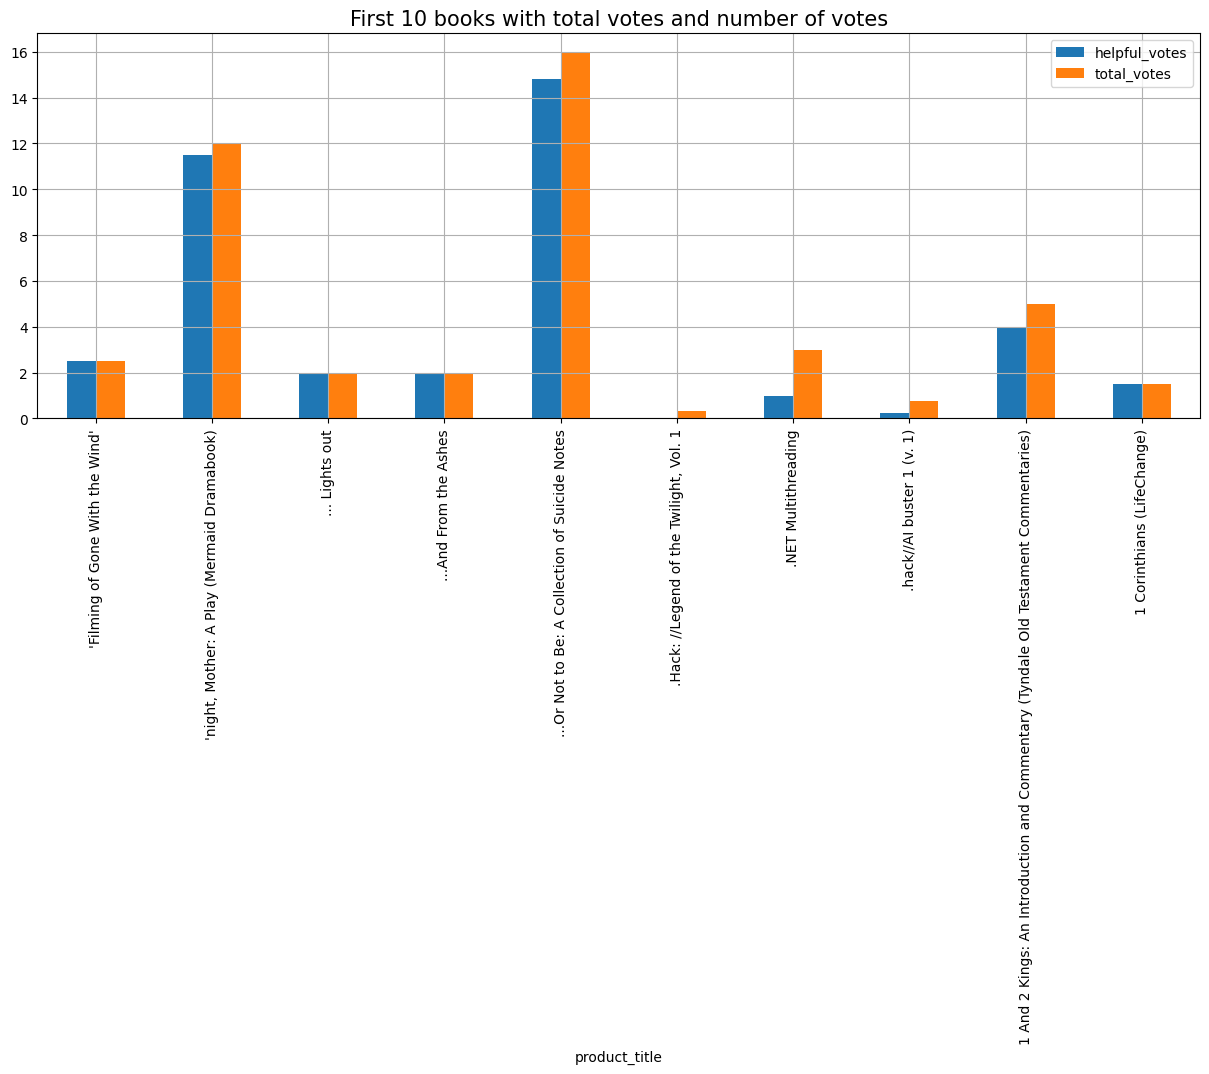

In [63]:
books_votes.plot(kind='bar', figsize=(15,5))
plt.title('First 10 books with total votes and number of votes', fontsize = 15)
plt.grid()
plt.show()

##  categories with Highest and Lowest Star Rating

C:\Users\Manali\AppData\Local\Temp\ipykernel_5300\1520345376.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_rating = amazon_books_data.groupby('categories').mean().sort_values(ascending = False, by='star_rating').head(10)


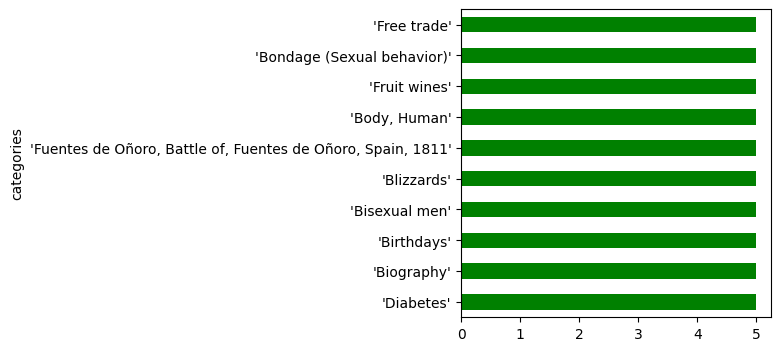

In [82]:
plt.figure(figsize=(4,4))
highest_rating = amazon_books_data.groupby('categories').mean().sort_values(ascending = False, by='star_rating').head(10)
highest_rating['star_rating'].plot(kind ='barh', color='green')
plt.title('categories with Highest Star Rating', fontsize = 15)
plt.show()

C:\Users\Manali\AppData\Local\Temp\ipykernel_5300\613249871.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lowest_rating = amazon_books_data.groupby('categories').mean().sort_values(ascending = False, by='star_rating').tail(10)


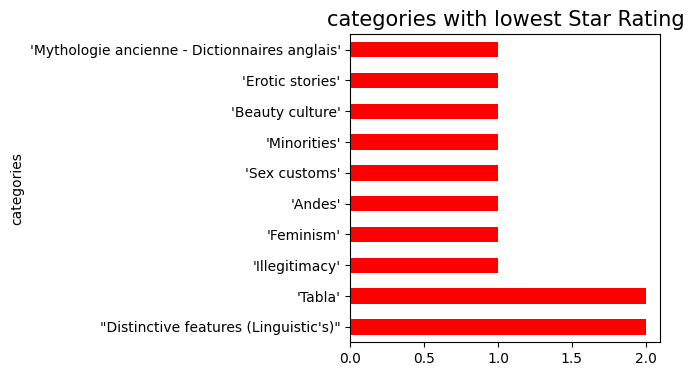

In [90]:
plt.figure(figsize=(4,4))
lowest_rating = amazon_books_data.groupby('categories').mean().sort_values(ascending = False, by='star_rating').tail(10)
lowest_rating['star_rating'].plot(kind ='barh', color="red")
plt.title('categories with lowest Star Rating', fontsize = 15)
plt.show()

## Authers with Highest & Lowest star ratings

C:\Users\Manali\AppData\Local\Temp\ipykernel_5300\911883788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  authers = amazon_books_data.groupby('authors').mean().sort_values(ascending = False, by='star_rating').head(10)


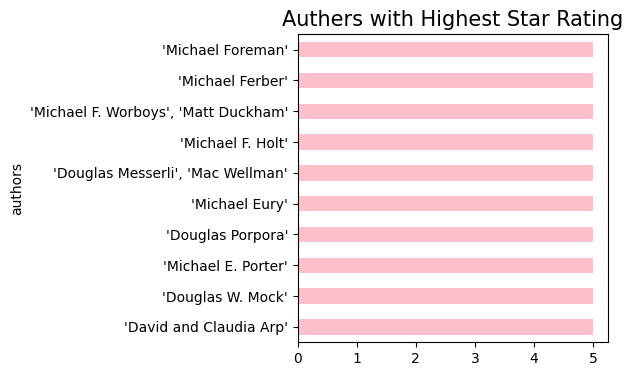

In [95]:
plt.figure(figsize=(4,4))
authers = amazon_books_data.groupby('authors').mean().sort_values(ascending = False, by='star_rating').head(10)
authers['star_rating'].plot(kind ='barh', color='pink')
plt.title('Authers with Highest Star Rating', fontsize = 15)
plt.show()


C:\Users\Manali\AppData\Local\Temp\ipykernel_5300\2809693998.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  auther_lowest = amazon_books_data.groupby('authors').mean().sort_values(ascending = False, by='star_rating').tail(10)


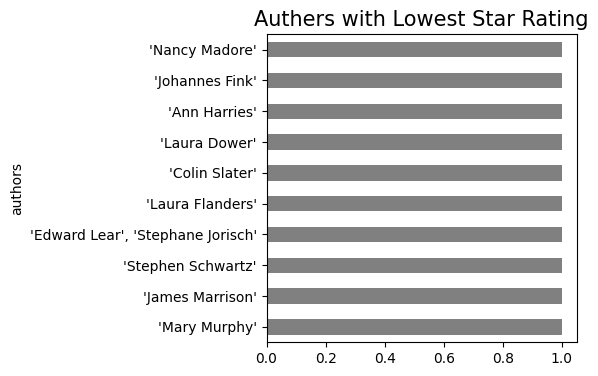

In [96]:
plt.figure(figsize=(4,4))
auther_lowest = amazon_books_data.groupby('authors').mean().sort_values(ascending = False, by='star_rating').tail(10)
auther_lowest['star_rating'].plot(kind ='barh', color="gray")
plt.title('Authers with Lowest Star Rating', fontsize = 15)
plt.show()
plt.show()

## Number of Books Written by the Authers 

<Axes: >

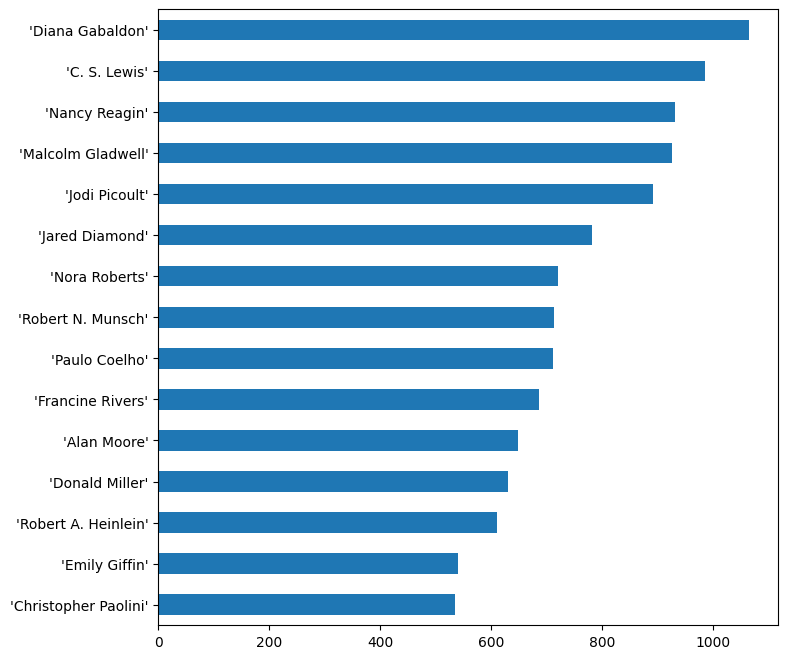

In [98]:
amazon_books_data['authors'].value_counts().head(15).sort_values(ascending= True ).plot(kind="barh")